## Introduction
We've already seen them in the previous chapters. They are special methods with fixed names. They are the methods with this clumsy syntax, i.e. the double underscores at the beginning and the end. They are also hard to talk about. How do you pronounce or say a method name like ```__init__```? "Underscore underscore init underscore underscore" sounds horrible and is almost a tongue twister. "Double underscore init double underscore" is a lot better, but the ideal way is "dunder init dunder" **That's why magic methods are sometimes called dunder methods!**

So what's magic about the ```__init__``` method? The answer is: you don't have to invoke it directly. The invocation is realized behind the scenes. When you create an instance x of a class A with the statement "x = A()", Python will do the necessary calls to ```__new__``` and ```__init__```.

Towards the end of this chapter we will introduce the ```__call__``` method. It is a functionality which many programming languages do not have, so programmers generally do not look for it. The ```__call__``` method enables Python programmers to write classes where the instances behave like functions. Both functions and the instances of such classes are called callables.

We have encountered the concept of operator overloading many times in this course. We had used the plus sign to add numerical values, to concatenate strings or to combine lists:

In [1]:
4 + 5

9

In [2]:
3.8 + 9

12.8

In [3]:
"Peter" + " " + "Pan"

'Peter Pan'

In [4]:
[3,6,8] + [7,11,13]

[3, 6, 8, 7, 11, 13]

It's even possible to overload the "+" operator as well as all the other operators for the purposes of your own class. To do this, you need to understand the underlying mechanism. There is a special (or a "magic") method for every operator sign. The magic method for the "+" sign is the ```__add__``` method. For "-" it is ```__sub__``` and so on. There's a complete listing of all the magic methods a little further down.

The mechanism works like this: If we have an expression "x + y" and x is an instance of class K, then Python will check the class definition of K. If K has a method ```__add__``` it will be called with ```x.__add__(y)```, otherwise we will get an error message:
```
Traceback (most recent call last):
  File "", line 1, in 
TypeError: unsupported operand type(s) for +: 'K' and 'K'
```

## Overview of Magic Methods
### Binary Operators

| Operator | Method |
| --- | --- |
| + | ```object.__add__(self, other)``` |
| - | ```object.__sub__(self, other)``` |
| \* | ```object.__mul__(self, other)``` |
| // | ```object.__floordiv__(self, other)``` |
| / | ```object.__truediv__(self, other)``` |
| % | ```object.__mod__(self, other)``` |
| ** | ```object.__pow__(self, other[, modulo])``` |
| << | ```object.__lshift__(self, other)``` |
| >> | ```object.__rshift__(self, other)``` |
| & | ```object.__and__(self, other)``` |
| ^ | ```object.__xor__(self, other)``` |
| | | ```object.__or__(self, other)``` |

### Extended Assignments

| Operator | Method |
| --- | --- |
| += | ```object.__iadd__(self, other)``` |
| -= | ```object.__isub__(self, other)``` |
| \*= | ```object.__imul__(self, other)``` |
| //= | ```object.__ifloordiv__(self, other)``` |
| /= | ```object.__idiv__(self, other)``` |
| %= | ```object.__imod__(self, other)``` |
| \*\*= | ```object.__ipow__(self, other[, modulo])``` |
| <<= | ```object.__ilshift__(self, other)``` |
| >>= | ```object.__irshift__(self, other)``` |
| &= | ```object.__iand__(self, other)``` |
| ^= | ```object.__ixor__(self, other)``` |
| \|= | ```object.__ior__(self, other)``` |

### Unary Operators

| Operator | Method |
| --- | --- |
| - | ```object.__neg__(self)``` |
| + | ```object.__pos__(self)``` |
| abs() | ```object.__abs__(self)``` |
| ~ | ```object.__invert__(self)``` |
| complex() | ```object.__complex__(self)``` |
| int() | ```object.__int__(self)``` |
| long() | ```object.__long__(self)``` |
| float() | ```object.__float__(self)``` |
| oct() | ```object.__oct__(self)``` |
| hex() | ```object.__hex__(self)``` |

### Comparison Operators

| Operator | Method |
| --- | --- |
| < | ```object.__lt__(self, other)``` |
| <= | ```object.__le__(self, other)``` |
| == | ```object.__eq__(self, other)``` |
| != | ```object.__ne__(self, other)``` |
| >= | ```object.__ge__(self, other)``` |
| > | ```object.__gt__(self, other)``` |

## Example class: Length
We will demonstrate the Length class and how you can overload the "+" operator for your own class. To do this, we have to overload the ```__add__``` method. Our class contains the ```__str__``` and ```__repr__``` methods as well. The instances of the class ```Length``` contain length or distance information. The attributes of an instance are self.value and self.unit.

This class allows us to calculate expressions with mixed units like this one:
```
2.56 m + 3 yd + 7.8 in + 7.03 cm
```
The listing of the class:

In [8]:
class Length:
    __metric = {"mm" : 0.001, "cm" : 0.01, "m" : 1, "km" : 1000,
                "in" : 0.0254, "ft" : 0.3048, "yd" : 0.9144,
                "mi" : 1609.344 }
    def __init__(self, value, unit = "m" ):
        self.value = value
        self.unit = unit
    def Converse2Metres(self):
        return self.value * Length.__metric[self.unit]
    def __add__(self, other):
        l = self.Converse2Metres() + other.Converse2Metres()
        return Length(l / Length.__metric[self.unit], self.unit )
    def __str__(self):
        return str(self.Converse2Metres())
    def __repr__(self):
        return "Length(" + str(self.value) + ", '" + self.unit + "')"
if __name__ == "__main__":
    x = Length(4)
    print(x)
    y = eval(repr(x))
    z = Length(4.5, "yd") + Length(1)
    print(repr(z))
    print(z)

4
Length(5.593613298337708, 'yd')
5.1148


In [9]:
# the class can be used like this
L = Length
print(L(2.56,"m") + L(3,"yd") + L(7.8,"in") + L(7.03,"cm"))

5.57162


We use the method ```__iadd__``` to implement the extended assignment:
```
def __iadd__(self, other):
    l = self.Converse2Metres() + other.Converse2Metres()
    self.value = l / Length.__metric[self.unit]
    return self
```
Now we are capable of writing the following assignments:
```
x += Length(1)
x += Length(4, "yd")
```
We added 1 metre in the example above by writing "x += Length(1))". Most certainly, you will agree with us that it would be more convenient to simply write "x += 1" instead. We also want to treat expressions like "Length(5,"yd") + 4.8" similarly. So, if somebody uses a type int or float, our class takes it automatically for "metre" and converts it into a Length object. It's easy to adapt our ```__add__``` and ```__iadd__``` method for this task. All we have to do is to check the type of the parameter "other":
```
def __add__(self, other):
    if type(other) == int or type(other) == float:
        l = self.Converse2Metres() + other
    else:
        l = self.Converse2Metres() + other.Converse2Metres()
    return Length(l / Length.__metric[self.unit], self.unit )
def __iadd__(self, other):
    if type(other) == int or type(other) == float:
        l = self.Converse2Metres() + other
    else:
        l = self.Converse2Metres() + other.Converse2Metres()
    self.value += l / Length.__metric[self.unit]
    return self
```

It's a safe bet that if somebody works with adding integers and floats from the right side for a while, he or she will want to have the same from the left side! What will happen if we execute the following code line?
```
x = 5 + Length(3, "yd")
```
We will get an exception:
```
AttributeError: 'int' object has no attribute 'Converse2Metres'
```
Of course, the left side has to be of type "Length", because otherwise Python tries to apply the ```__add__``` method from int, which can't cope with Length objects as second arguments!

Python provides a solution for this problem as well. It's the ```__radd__``` method. It works like this: Python tries to evaluate the expression "5 + Length(3, 'yd')". First it calls ```int.__add__(5,Length(3, 'yd'))```, which will raise an exception. After this it will try to invoke ```Length.__radd__(Length(3, "yd"), 5)```. It's easy to recognize that the implementation of ```__radd__``` is analogue to ```__add__```:
```
def __radd__(self, other):
    if type(other) == int or type(other) == float:
        l = self.Converse2Metres() + other
    else:
        l = self.Converse2Metres() + other.Converse2Metres()
    return Length(l / Length.__metric[self.unit], self.unit )
```
It's advisable to make use of the ```__add__``` method in the ```__radd__``` method:
```
def __radd__(self, other):
    return Length.__add__(self,other)  
```
The following diagram illustrates the relationship between ```__add__``` and ```__radd__```:

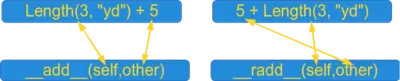

## Standard Classes as Base Classes
It's possible to use standard classes - like int, float, dict or lists - as base classes as well.

We extend the list class by adding a push method:

In [10]:
class Plist(list):
    def __init__(self, l):
        list.__init__(self, l)
    def push(self, item):
        self.append(item)
if __name__ == "__main__":
    x = Plist([3,4])
    x.push(47)
    print(x)

[3, 4, 47]


This means that all the previously introduced binary and extended assignment operators exist in the "reversed" version as well:
```__radd__```, ```__rsub__```, ```__rmul__```, etc.

## Exercise
Write a class with the name Ccy, similar to the previously defined Length class.Ccy should contain values in various currencies, e.g. "EUR", "GBP" or "USD". An instance should contain the amount and the currency unit. The class, you are going to design as an exercise, might be best described with the following example session:
```
from currencies import Ccy
v1 = Ccy(23.43, "EUR")
v2 = Ccy(19.97, "USD")
print(v1 + v2)
print(v2 + v1)
print(v1 + 3) # an int or a float is considered to be a EUR value
print(3 + v1)
```

In [11]:
# Solution to Exercise
"""
    The class "Ccy" can be used to define money values in various currencies. A Ccy instance has the string attributes 'unit' (e.g. 'CHF', 'CAD' od 'EUR' and the 'value' as a float. 
    A currency object consists of a value and the corresponding unit.
    """
class Ccy:
    currencies =  {'CHF': 1.0821202355817312, 
                       'CAD': 1.488609845538393, 
                       'GBP': 0.8916546282920325, 
                       'JPY': 114.38826536281809, 
                       'EUR': 1.0, 
                       'USD': 1.11123458162018}
    def __init__(self, value, unit="EUR"):
        self.value = value
        self.unit = unit
    def __str__(self):
        return "{0:5.2f}".format(self.value) + " " + self.unit
    def changeTo(self, new_unit):
        """
            An Ccy object is transformed from the unit "self.unit" to "new_unit"
        """
        self.value = (self.value / Ccy.currencies[self.unit] * Ccy.currencies[new_unit])
        self.unit = new_unit
    def __add__(self, other):
        """
            Defines the '+' operator.
            If other is a CCy object the currency values 
            are added and the result will be the unit of 
            self. If other is an int or a float, other will
            be treated as a Euro value. 
        """
        if type(other) == int or type(other) == float:
            x = (other * Ccy.currencies[self.unit])
        else:
            x = (other.value / Ccy.currencies[other.unit] * Ccy.currencies[self.unit]) 
        return Ccy(x + self.value, self.unit)
    def __iadd__(self, other):
        """
            Similar to __add__
        """
        if type(other) == int or type(other) == float:
            x = (other * Ccy.currencies[self.unit])
        else:
            x = (other.value / Ccy.currencies[other.unit] * Ccy.currencies[self.unit])
        self.value += x
        return self
    def __radd__(self, other):
        res = self + other
        if self.unit != "EUR":
            res.changeTo("EUR")
        return res
        # __sub__, __isub__ and __rsub__ can be defined analogue

In [12]:
# now test the class to see if it produces the correct output
x = Ccy(10,"USD")
y = Ccy(11)
z = Ccy(12.34, "JPY")
z = 7.8 + x + y + 255 + z
print(z)
lst = [Ccy(10,"USD"), Ccy(11), Ccy(12.34, "JPY"), Ccy(12.34, "CAD")]
z = sum(lst)
print(z)

282.91 EUR
28.40 EUR


Another interesting aspect of this currency converter class in Python can be shown if we add multiplication. You will easily understand that it makes no sense to allow expressions like "12.4 € \* 3.4 USD" (or in prefix notation: "€ 12.4 $ 3.4"), but it makes perfect sense to evaluate "34.54 €". You can find the new currency converter class with the newly added methods for ```__mul__```, ```__imul__``` and ```__rmul__``` in the following listing:

In [13]:
"""
    The class "Ccy" can be used to define money values in various currencies. A Ccy instance has the string attributes 'unit' (e.g. 'CHF', 'CAD' od 'EUR' and the 'value' as a float. 
    A currency object consists of a value and the corresponding unit.
"""   
class Ccy:
    currencies =  {'CHF': 1.0821202355817312, 
                       'CAD': 1.488609845538393, 
                       'GBP': 0.8916546282920325, 
                       'JPY': 114.38826536281809, 
                       'EUR': 1.0, 
                       'USD': 1.11123458162018}
    def __init__(self, value, unit="EUR"):
        self.value = value
        self.unit = unit
    def __str__(self):
        return "{0:5.2f}".format(self.value) + " " + self.unit
    def __repr__(self):
        return 'Ccy(' + str(self.value) + ', "' + self.unit + '")'
    def changeTo(self, new_unit):
        """
            An Ccy object is transformed from the unit "self.unit" to "new_unit"
        """
        self.value = (self.value / Ccy.currencies[self.unit] * Ccy.currencies[new_unit])
        self.unit = new_unit
    def __add__(self, other):
        """
            Defines the '+' operator.
            If other is a CCy object the currency values 
            are added and the result will be the unit of 
            self. If other is an int or a float, other will
            be treated as a Euro value. 
        """
        if type(other) == int or type(other) == float:
                x = (other * Ccy.currencies[self.unit])
        else:
                x = (other.value / Ccy.currencies[other.unit] * Ccy.currencies[self.unit]) 
        return Ccy(x + self.value, self.unit)
    def __iadd__(self, other):
        """
            Similar to __add__
        """
        if type(other) == int or type(other) == float:
            x = (other * Ccy.currencies[self.unit])
        else:
            x = (other.value / Ccy.currencies[other.unit] * Ccy.currencies[self.unit])
            self.value += x
        return self
    def __radd__(self, other):
        res = self + other
        if self.unit != "EUR":
            res.changeTo("EUR")
        return res
        # __sub__, __isub__ and __rsub__ can be defined analogue
    def __mul__(self, other):
        """
            Multiplication is only defined as a scalar multiplication, 
            i.e. a money value can be multiplied by an int or a float.
            It is not possible to multiply to money values
        """
        if type(other)==int or type(other)==float:
            return Ccy(self.value * other, self.unit)
        else:
            raise TypeError("unsupported operand type(s) for *: 'Ccy' and " + type(other).__name__)  
    def __rmul__(self, other):
        return self.__mul__(other)
    def __imul__(self, other):
        if type(other)==int or type(other)==float:
            self.value *= other
            return self
        else:
            raise TypeError("unsupported operand type(s) for *: 'Ccy' and " + type(other).__name__) 

In [15]:
# let's test our new class implementation
x = Ccy(10.00, "EUR")
y = Ccy(10.00, "GBP")
x + y

Ccy(21.215104685942173, "EUR")

In [16]:
print(x + y)

21.22 EUR


In [17]:
print(2*x + y*0.9)

30.09 EUR
